In [1]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

with open("Plot1Data.pickle", "rb") as f:
    df = pickle.load(f)

with open("Plot2Data.pickle", "rb") as f:
    df2 = pickle.load(f)

# Plot 1 - Relative Solar Energy output by Region

### Explanation:

The plot shows the relative daily solar output from residential solar systems in the (geographically close) areas of Sydney, Newcastle and Central Coast in New South Wales, Australia. The figure is generated from energy generation data collected from 300 customers over a 3 year period. The raw data is collected by their electricity meter, configured to record gross energy generation for every half-hour period. The dashed horizontal lines on the inside of each violin indicate the quartiles.

*Relative Daily Solar Output*: For each day, the relative daily solar output is the amount of energy generated over the entire day (in kWhr), divided by the maximum capacity of the installed system (in kW). Consequently, the metric accounts for varying system install sizes.

Interesting to note is that a solar system installed in the Sydney area, in comparison to the nearby Newcastle and Central Coast, produces less solar energy per kW of install capacity. On average, this is approximately 6-7% less, but is unlikely to be due to different levels of sunshine given the areas are reasonably close (in a geographical sense). More likely is that the difference and can be attributed to higher levels of air pollution.

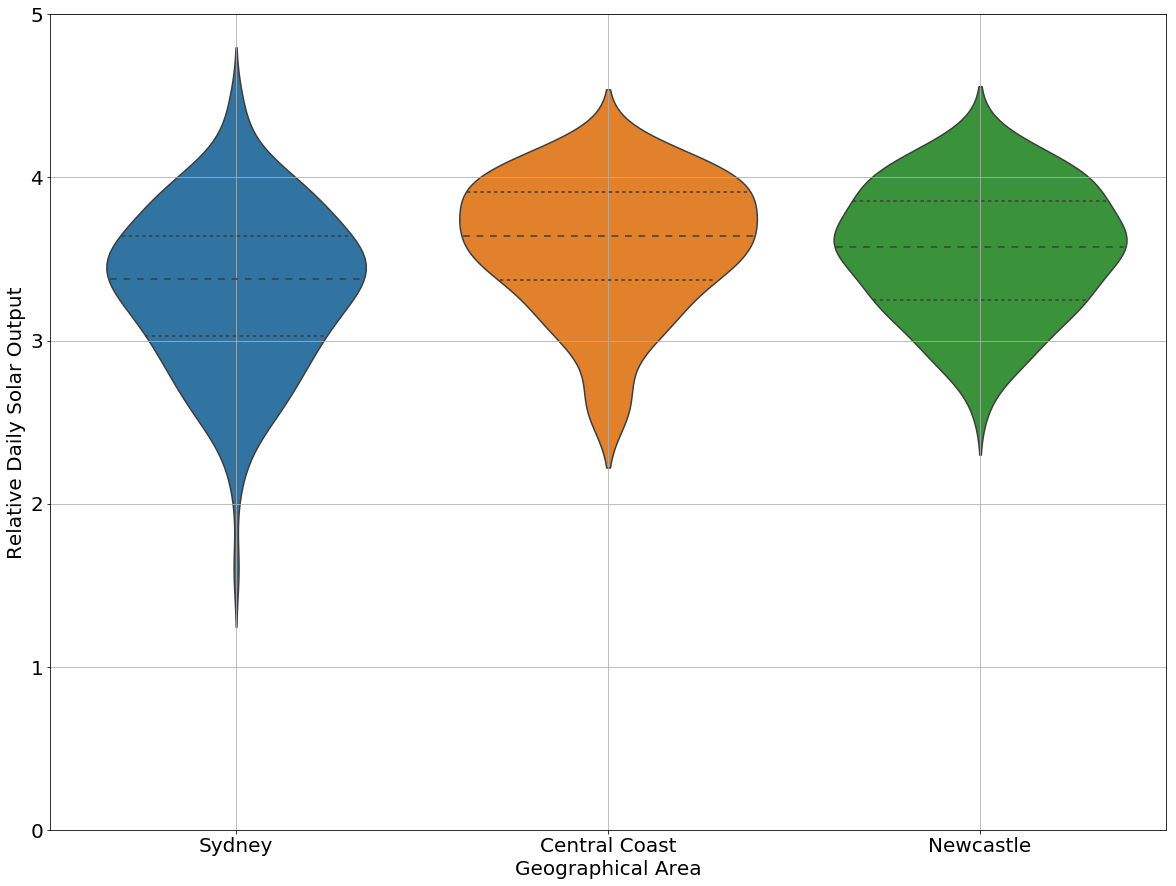

In [2]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.violinplot(x=df["Area"], y=df["RelTotal"], inner="quartile")
ax.set_ylim(0,5)
ax.set_xlabel("Geographical Area", size=20)
ax.set_ylabel("Relative Daily Solar Output", size=20)
ax.grid()
ax.tick_params(labelsize=20)

# Plot 2 - Relative Solar Energy output by Region, averaged by month

### Explanation:

The plot shows the relative output from residential solar systems, averaged over calendar months, in the Sydney, Newcastle and Central Coast areas in New South Wales, Australia. Shown is the relative daily output averaged over the respective calendar months, so seasonal bias is reduced.

*Reducing seasonal bias*: Seasonal bias may occur if the time period for which the data is collected is not the same for all regions. Hypothetically, if records started in January (southern hemisphere summer) for Newcastle, but didn't start until March (southern hemisphere autumn) for Sydney, this would lead to lower-than-actual calculations  of the relative daily output for Sydney (in comparison to Newcastle). It may be the case that Sydney's lower calculated relative daily output (presented in the previous plot) may simply be caused by inconsistent data collection.

This plot clarifies that this possibility is not the case, given the time-consistent nature of the relatively poor performance. It therefore supports the hypothesis that air pollution is the cause of the relatively poor performance of solar systems in Sydney, in comparison to the nearby areas of Newcastle and Central Coast.

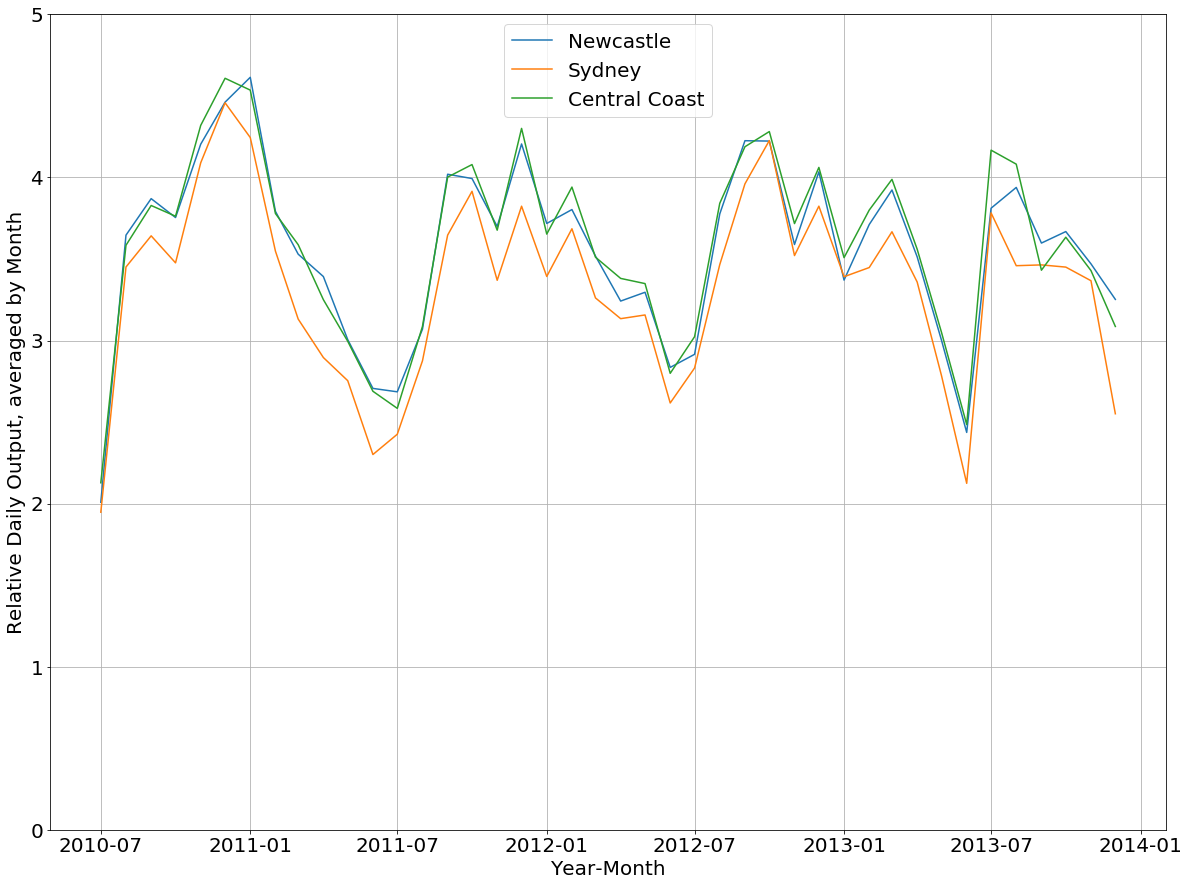

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
for area in ["Newcastle", "Sydney", "Central Coast"]:
    ax.plot(df2[("RelTotal", area)], label=area)
ax.legend(fontsize=20, loc="upper center")
ax.set_ylim(0,5)
ax.set_xlabel("Year-Month", size=20)
ax.set_ylabel("Relative Daily Output, averaged by Month", size=20)
ax.grid()
ax.tick_params(labelsize=20)